In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import uproot
import math
from glob import glob
import awkward as ak
%matplotlib inline

prop_cycle = plt.rcParams['axes.prop_cycle']
_colors = prop_cycle.by_key()['color']
_save_dir = 'plots/'

Momentum: MeV

Mass: MeV/c

Velocity: m/s

Lenght: m

In [2]:
def beta_f(p, m):
    num = p / (m)
    den = np.sqrt(1 + (num)**2)
    return num / den

def velocity_f(p, m, c=299792458):
    return beta_f(p, m) * c

def tof_f(p, m, L):
    vel = velocity_f(p, m)
    return L / vel
    

In [3]:
beta_f(1000, 0.5)

0.9999998750000234

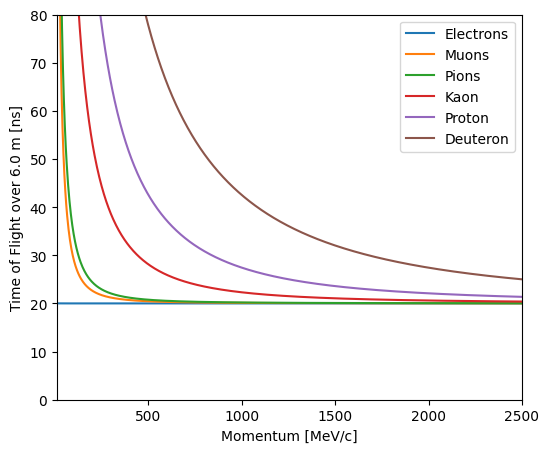

In [9]:
distance=6 #m
p = np.linspace(10, 2500, 1000)
tof = tof_f(p, m=0.510, L=10) * 1e9

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 5))

ax.plot(p, tof_f(p, m=0.510, L=distance) * 1e9, label='Electrons')
ax.plot(p, tof_f(p, m=105.658, L=distance) * 1e9, label='Muons')
ax.plot(p, tof_f(p, m=139.57, L=distance) * 1e9, label='Pions')
ax.plot(p, tof_f(p, m=493.677, L=distance) * 1e9, label='Kaon')
ax.plot(p, tof_f(p, m=938.272, L=distance) * 1e9, label='Proton')
ax.plot(p, tof_f(p, m=1875.6 , L=distance) * 1e9, label='Deuteron')
# ax.plot(p, tof_f(p, m=0.510, L=1000) * 1e9)

ax.set_xlim([10, 2500])
ax.set_ylim([0, 80])

ax.legend()
ax.set_xlabel('Momentum [MeV/c]')
ax.set_ylabel(f'Time of Flight over {distance:.1f} m [ns]')
# ax.set_title(f'Detector: {det}; Config: {config}', loc='right', fontsize=8)

plt.savefig(_save_dir + 'tof.pdf')

plt.show()
